# Custom feature images
You can also use custom feature image in apoc, e.g. images computed using [scikit-image filters](https://scikit-image.org/docs/stable/api/skimage.filters.html).

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
from skimage.filters import gaussian, sobel
import numpy as np
import apoc

To demonstrate that, we load an example image and a corresponding annotation to segment blobs:

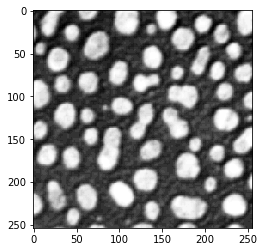

In [2]:
raw_image = imread("blobs.tif")
imshow(raw_image)

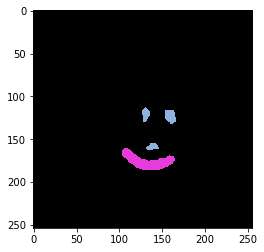

In [3]:
annotation = imread("annotations.tif")
imshow(annotation, labels=True)

From the raw image, we use scikit-image to compute custom feature images and store them in a list.

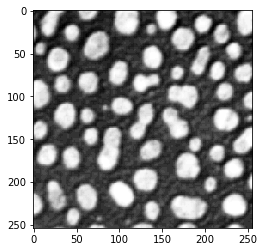

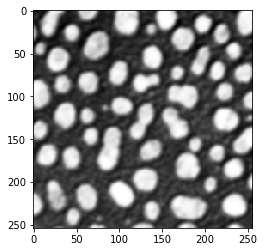

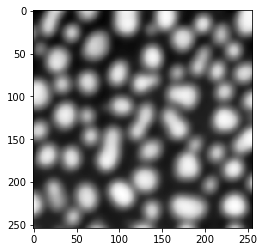

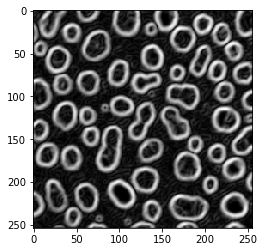

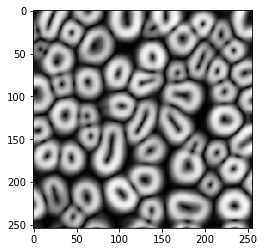

In [4]:
feature_images = [
    raw_image,
    gaussian(raw_image, sigma=1),
    gaussian(raw_image, sigma=5),
    sobel(gaussian(raw_image, sigma=1)),
    sobel(gaussian(raw_image, sigma=5)),
]
for i in feature_images:
    imshow(i)

This custom feature image list can be entered in the `train()` function as `image` as if we were processing a multi-channel image. The entries in the list must have the same shape as the `annotation` image. To prevent other feature images to be computed, we just define `features='original'`.

In [5]:
obseg = apoc.ObjectSegmenter()
obseg.train(features="original", image=feature_images, ground_truth=annotation)

Note, when predicting a segmentation, you need to pass a list of feature images in the same order as when the segmenter was trained.

cl.OCLArray([[ 0,  0,  0, ..., 58, 58, 58],
       [ 0,  0,  0, ..., 58, 58, 58],
       [ 0,  0,  0, ..., 58, 58, 58],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
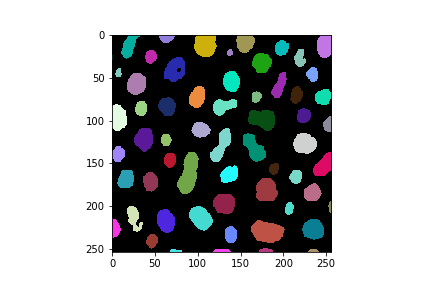

In [6]:
result = obseg.predict(image=feature_images)
result